The uploaded ClassicalMachineLearning.ipynb notebook in course material is the main reference for this project.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

#1. Linear regression on the start-up dataset.

In [2]:
df = pd.read_csv("StartUpProfits.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


##(a) How many samples does this dataset have?  Answer = 50.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


##(b) Are there any missing values in the dataset? Answer = No.

In [4]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
for col in df.columns:
  print(col, ":\n", df[col].unique(), "\n")

R&D Spend :
 [165349.2  162597.7  153441.51 144372.41 142107.34 131876.9  134615.46
 130298.13 120542.52 123334.88 101913.08 100671.96  93863.75  91992.39
 119943.24 114523.61  78013.11  94657.16  91749.16  86419.7   76253.86
  78389.47  73994.56  67532.53  77044.01  64664.71  75328.87  72107.6
  66051.52  65605.48  61994.48  61136.38  63408.86  55493.95  46426.07
  46014.02  28663.76  44069.95  20229.59  38558.51  28754.33  27892.92
  23640.93  15505.73  22177.74   1000.23   1315.46      0.      542.05] 

Administration :
 [136897.8  151377.59 101145.55 118671.85  91391.77  99814.71 147198.87
 145530.06 148718.95 108679.17 110594.11  91790.61 127320.38 135495.07
 156547.42 122616.84 121597.55 145077.58 114175.79 153514.11 113867.3
 153773.43 122782.75 105751.03  99281.34 139553.16 144135.98 127864.55
 182645.56 153032.06 115641.28 152701.92 129219.61 103057.49 157693.92
  85047.44 127056.21  51283.14  65947.93  82982.09 118546.05  84710.77
  96189.63 127382.3  154806.14 124153.04 1158

##(c) Is linear regression a suitable method for this dataset at all? Answer = Yes.

###Convert State values

In [6]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [7]:
df['State'].replace(['New York', 'California', 'Florida'], [0, 1, 2], inplace=True)

In [8]:
df['State'].unique()

array([0, 1, 2])

###Data correlation

Heat map of the data correlation

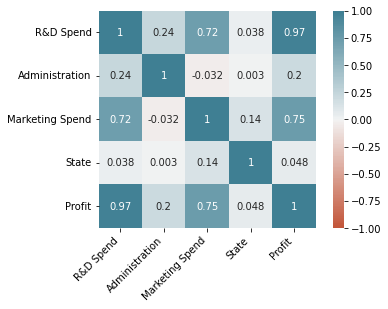

In [9]:
corr = df.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Strong positive correlation between "R&D Spend" and "Profit"(target).

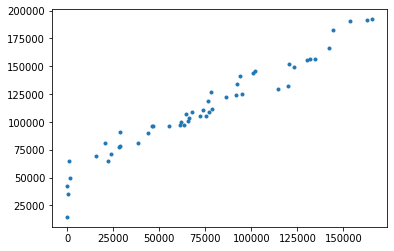

In [10]:
plt.plot(df['R&D Spend'], df['Profit'],'.')

Visible linear correlation between "R&D Spend" and "Profit"(target).

##Linear regression

###Train model

In [11]:
target = df['Profit']
feature = np.expand_dims(df['R&D Spend'], axis=1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, shuffle=True)

In [13]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

###Performance on Train data

In [14]:
y_pred = model.predict(X_train)
print('R2-score: %.2f'
      % r2_score(y_train, y_pred))

R2-score: 0.96


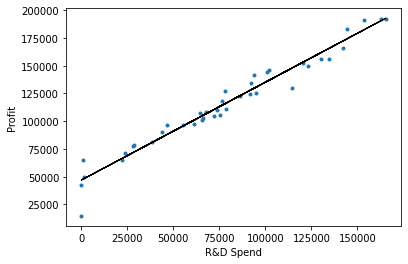

In [15]:
plt.plot(X_train, y_train, '.')
plt.plot(X_train, y_pred , color='k', linewidth=1)
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

###Performance on Test data

In [16]:
y_pred = model.predict(X_test)
print('R2-score: %.2f'
      % r2_score(y_test, y_pred))

R2-score: 0.85


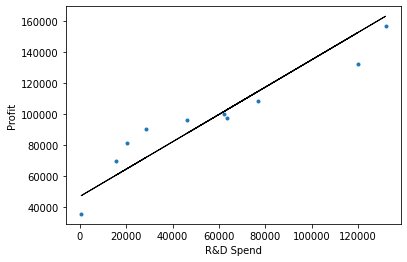

In [17]:
plt.plot(X_test, y_test, '.')
plt.plot(X_test, y_pred, color='k', linewidth=1)
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

#2. Logistic regression on the Titanic dataset.

data: [url](https://www.kaggle.com/c/titanic/data?select=train.csv)

In [18]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv("test.csv")
df = pd.concat([train_data, test_data])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##(a) Are there any missing values in the dataset? If so, what would be the most appropriate way of dealing with them? 
Answer = Yes, drop the rows with missing label and put zero as the value for other columns.

In [19]:
display(df.info(), df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


None

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

###Drop the rows with missing Survived values and Put zero as other missing value

In [20]:
df = df[df['Survived'].notna()].astype({'Survived': int})
df = df.fillna(0)
display(df.info(), df.isnull().sum(), df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


None

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


##(b) Have there been more male or more female survivors? What about the influence on which class the passengers travelled in?
Answer : 


*   Male \ Female = 109 \ 233
*   1st \ 2nd \ 3rd class = 136 \ 87 \ 119




In [21]:
male = df[df['Sex'] == 'male'].Survived.to_numpy()
female = df[df['Sex'] == 'female'].Survived.to_numpy()
print('Male survival number:', male.sum(), '\nFemale survival number:', female.sum(), '\n')
print('Male survival ratio:  %.2f' % (male.sum()/len(male)), '\nFemale survival ratio:  %.2f' % (female.sum()/len(female)))

Male survival number: 109 
Female survival number: 233 

Male survival ratio:  0.19 
Female survival ratio:  0.74


In [22]:
one = df[df['Pclass'] == 1].Survived.to_numpy()
two = df[df['Pclass'] == 2].Survived.to_numpy()
three = df[df['Pclass'] == 3].Survived.to_numpy()
print('1st class survival number:', one.sum(), '\n2nd class survival number:', two.sum(), '\n3rd class survival number:', three.sum(), '\n')
print('1st class survival ratio:  %.2f' % (one.sum()/len(one)), '\n2nd class survival ratio:  %.2f' % (two.sum()/len(two)), '\n3rd class survival ratio  %.2f' % (three.sum()/len(three)))

1st class survival number: 136 
2nd class survival number: 87 
3rd class survival number: 119 

1st class survival ratio:  0.63 
2nd class survival ratio:  0.47 
3rd class survival ratio  0.24


##(c) Which features of the dataset do you think need to be included for predicting the survival of a passenge?
Answer= The 'Sex' and 'Pclass' were top two features that both selection methods agree on.

In [23]:
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
df.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Survived      int64
dtype: object

###Convert Sex values

In [24]:
df['Sex'].replace(['male', 'female'], [0, 1], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [25]:
df['Sex'].unique()

array([0, 1])

###Heat map of the data correlation

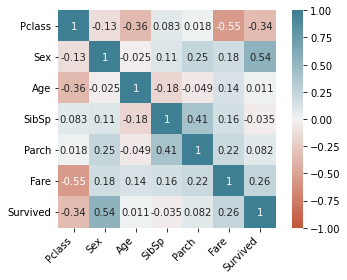

In [26]:
corr = df.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Top 3 highly correlated features with 'Survived' are: 


1.   Sex
2.   Pclass
3.   Fare



###Lasso regularization

Reference: Feature Selection with sklearn and Pandas, Abhini Shetye. [url](https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b)


In [27]:
X = df.loc[:, df.columns != 'Survived']
y = df['Survived']

In [28]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.007662
Best score using built-in LassoCV: 0.380779


In [29]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 5 variables and eliminated the other 1 variables


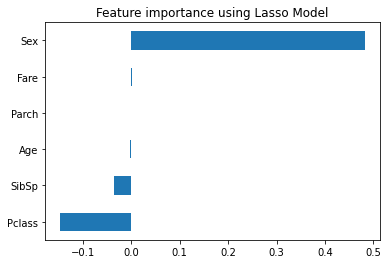

In [30]:
imp_coef = coef.sort_values()
import matplotlib
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
plt.show()

Top 3 important features for 'Survived' are: 


1.   Sex
2.   Pclass
3.   SibSp



## Logistic regression

###Train model

In [31]:
target = df['Survived']
features = df[['Sex', 'Pclass']]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [33]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

###Performance on Test data

In [35]:
y_pred = model.predict(X_test)

Accuracy

In [36]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy on the test dataset: {}'.format(acc))

Accuracy on the test dataset: 0.8212290502793296


Confusion Matrix

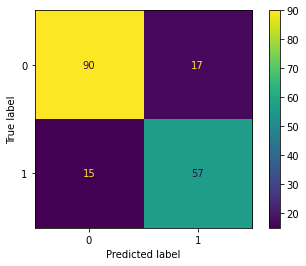

In [37]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

ROC curve

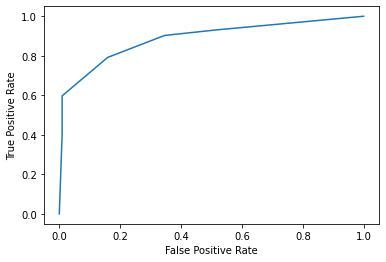

In [38]:
y_score = model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

Precision-Recall Curve

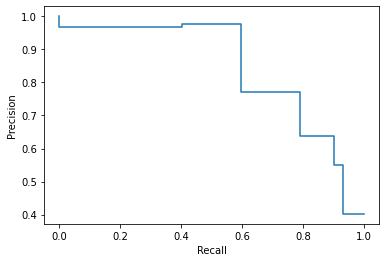

In [39]:
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=model.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()